# 大数の法則 (Law of Large Numbers, LLN)
- 標本平均はサンプル数を増やすにつれて、母平均に近づくという法則
- 言い換えると、標本平均分布の分散が0に収束していくということ

# 中心極限定理 (Central Limit Theorem, CLT)
- どんな母集団分布から得られた標本平均も、標本数が多いときには正規分布に従う
- 母平均が$\mu$, 母分散が$\sigma^2$なら、
    - $X_1 + X_2 + \cdots + X_n \sim N(n\mu, n\sigma^2)$
    - $X_1 + X_2 + \cdots + X_n \sim N(\mu, \sigma^2/n)$
        - $n\rightarrow\infty$のとき、$\sigma^2/n\rightarrow0$ (大数の法則)
    - とみなせる

# 番組視聴率
## 視聴率は平均とみなせる
- 視聴世帯は1, 非視聴世帯は0となる変数Xを考えると、$\bar{X}$は視聴率に相当する

## 母平均・母分散
- $N$: 母集団の数
- $n$: 標本数
- $X_i$: $i$番目の世帯に対応する確率変数
    - 視聴世帯なら$X_i=1$, 非視聴世帯なら$X_i=0$となる
- $p$: 母集団における番組視聴率
### 母平均
- $\mu = \frac{1}{N}(Np \cdot 1 + N(1-p) \cdot 0) = p$
- 母平均は確かに視聴率に一致

### 母分散
- $\sigma^2 = \frac{1}{N}(Np(1-\mu)^2 + N(1-p)(0-\mu^2)) = p(1-p)$
- 分散は偏差の2乗の平均値
- 視聴率に依存して変化する

## 信頼区間を考える
- 中心極限定理より
    - $n$を大きくとれば、$\bar{X}$は正規分布に従うので以下のことが言える
    - $P(\mu-1.96\frac{\sigma}{\sqrt{n}} < \bar{X} < \mu+1.96\frac{\sigma}{\sqrt{n}}) = 0.95$
        - 有意水準5%を想定
    - 式変形すると、
        - $P(\bar{X}-1.96\frac{\sigma}{\sqrt{n}} < \mu < \bar{X}+1.96\frac{\sigma}{\sqrt{n}}) = 0.95$
- 見方を変えると、
    - $|\bar{X}-\mu|>1.96\frac{\sigma}{\sqrt{n}}$ となる確率が5%
    - $1.96\frac{\sigma}{\sqrt{n}}$はどれほど誤差を許容するかという基準になるので変数$e$としておいてみる
        - $e = 1.96\frac{\sigma}{\sqrt{n}}$
    - $n$について解く
        - $n = \left(\frac{1.96}{e}\right)^2 \sigma^2 = \left(\frac{1.96}{e}\right)^2 p(1-p)$
    - どのくらいの誤差$e$を許容するかによって、標本数$n$の要件が決まる
- ただし$\sigma^2=p(1-p)$は未知なので、最悪なケースとして分散の最大値でシミュレーションする
    - $\sigma^2=p(1-p)$は、$p=\frac{1}{2}$で最大
        - $n = \left(\frac{1.96}{e}\right)^2 \cdot \frac{1}{2}(1-\frac{1}{2})$
        - これでシミュレーションすると下表の感じになる

|  $e$ (どのくらい許容する？) |  $n$ (必要な標本数) |
| ---- | ---- |
|  0.01  |  9604  |
|  0.02  |  2401  |
|  0.03  |  1067  |
|  0.04  |  600  |
|  0.05  |  384  |

- こういうのに基づいて、VRは世帯数を決めてるんじゃないかな？

# 大数の法則のシミュレーション

In [1]:
import numpy as np

import matplotlib.pyplot as plt
# グラフを横長にする
plt.rcParams['figure.figsize'] = 15, 6
# 文字サイズの指定
plt.rcParams["font.size"] = 18

## サンプル数が大きくなるにつれて標本平均は母平均に近づくのかを検証

In [2]:
def simulate_LLN(mu, sigma, total, step):
    """大数の定理を可視化してみる関数

        mu: 母集団正規分布の平均
        sigma: 母集団正規分布の分散
        total: 生成するサンプルの数
        step: 何サンプルずつ区切って、中心極限定理の挙動を見るか
    """
    samples = np.random.normal(loc=mu, scale=sigma, size=total)

    x = np.arange(step, total+1, step)
    avg_samples = []
    for num in x:
        avg_samples.append(samples[:num].mean())
    
    plt.plot(x, avg_samples, 'r')
    plt.plot(x, np.ones(len(x))*mu, 'k')
    plt.xlabel('The number of samples')
    plt.ylabel('Average')
    plt.xlim(1, total)

## やってみる
標本平均（赤線）がサンプル数の増加に伴い母平均（黒線）に近づいていく様子がわかる！

これが中心極限定理だぜ！

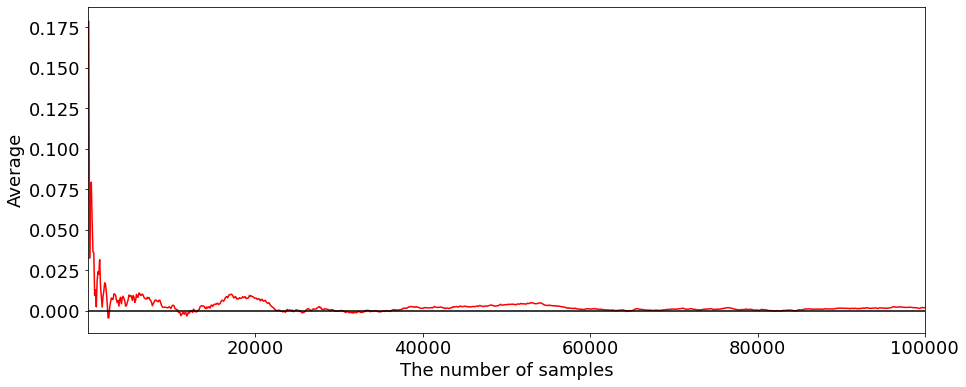

In [3]:
simulate_LLN(mu=0, sigma=1, total=int(1e5), step=100)

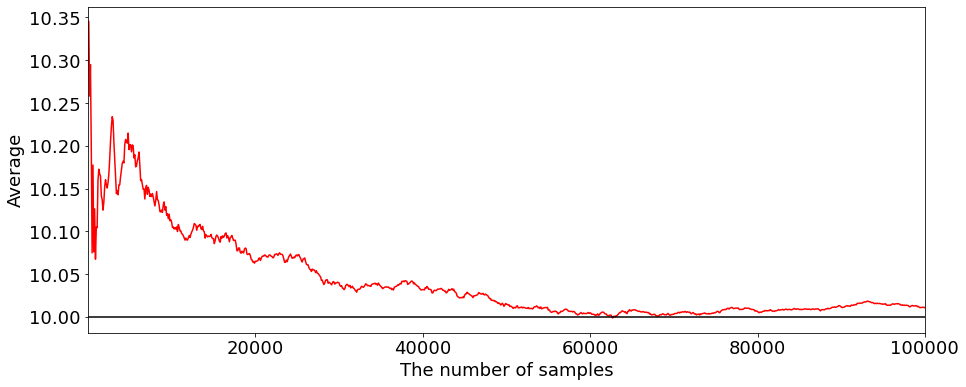

In [4]:
simulate_LLN(mu=10, sigma=5, total=int(1e5), step=100)

# 中心極限定理のシミュレーション
- 二項分布 $Bi(n, p)$ に従う観測値 $r$ を使用する
- $r \sim Bi(n, p)$ の場合、$r = x_1 + x_2 + \cdots + x_n$
    - $x_1, x_2, \cdots, x_n$ はそれぞれ独立にベルヌーイ分布 $Bi(1, p)$ に従う
- つまり二項分布に従う変数 $r$ はベルヌーイ分布に従う変数の和に相当する
    - 中心極限定理によれば、二項分布の試行回数 $n$ を増やすに伴い、$r$ の分布は正規分布に近づくはずである

## ということで、二項変数を生成して度数分布を見てみる
使い勝手いいように関数化しておく

In [5]:
def simulate_CLT(n, p, total):
    """中心極限定理を可視化してみる

        n: 二項分布で想定する試行回数
        p: 二項分布で想定する1回の試行での成功確率
        total: 生成する二項乱数の数
    """

    r = np.random.binomial(n, p, size=total) #Bi(n, p)に従う二項乱数をtotal個生成
    norm_r = (r - n*p) / np.sqrt(n*p*(1-p)) #標準化

    x = np.unique(norm_r) #ユニーク値の取得
    freq = np.array([np.count_nonzero(norm_r == v) for v in x]) #度数を算出
    freq = freq / total #相対頻度

    plt.plot(x, freq, 'k')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

## やってみる
- 試行回数 $n$ を増やすに連れて、正規分布の形状に近づいてくことがわかる


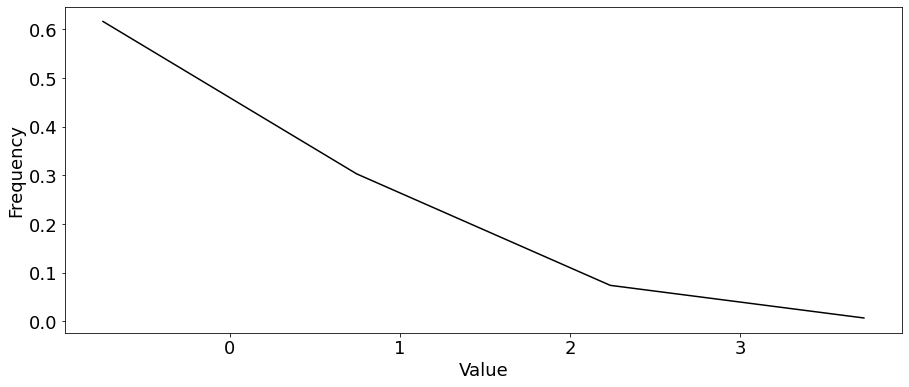

In [6]:
simulate_CLT(n=5, p=0.1, total=1000)

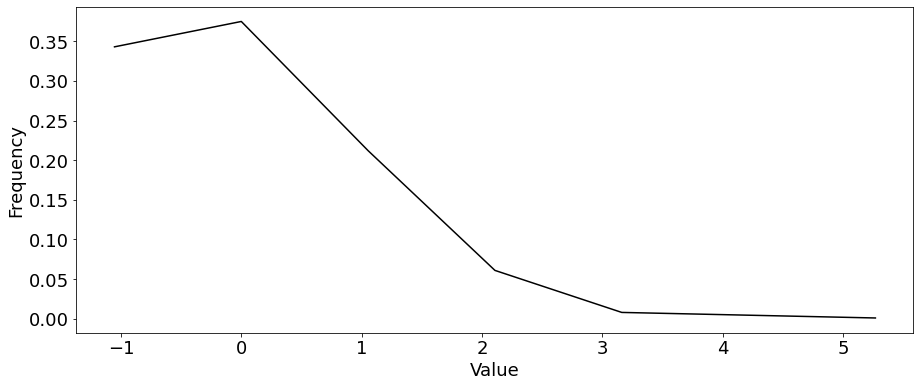

In [7]:
simulate_CLT(n=10, p=0.1, total=1000)

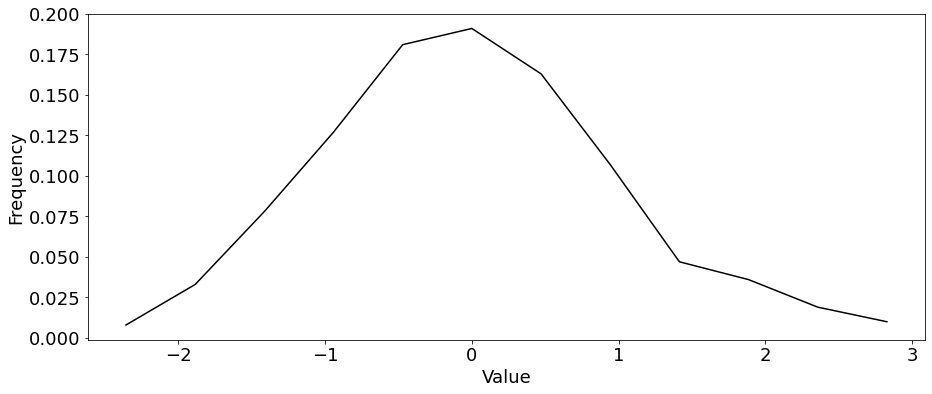

In [8]:
simulate_CLT(n=50, p=0.1, total=1000)

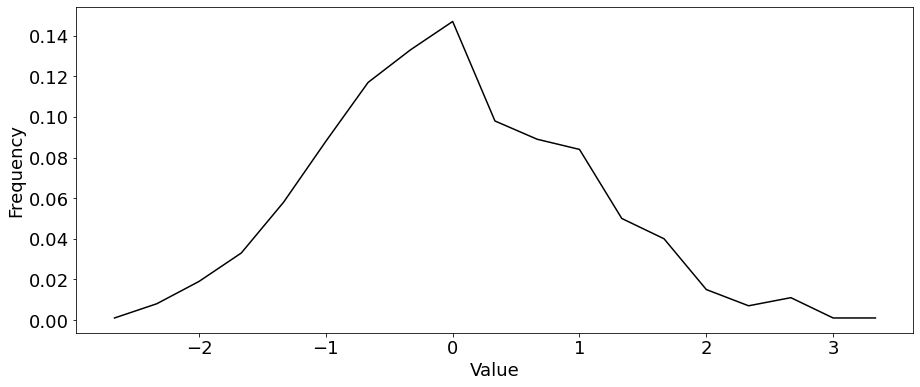

In [9]:
simulate_CLT(n=100, p=0.1, total=1000)

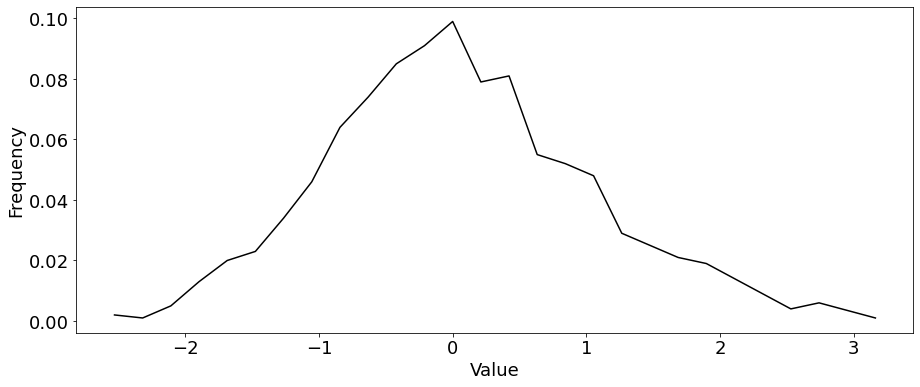

In [10]:
simulate_CLT(n=250, p=0.1, total=1000)

生成数を増やすとより正規分布に見える

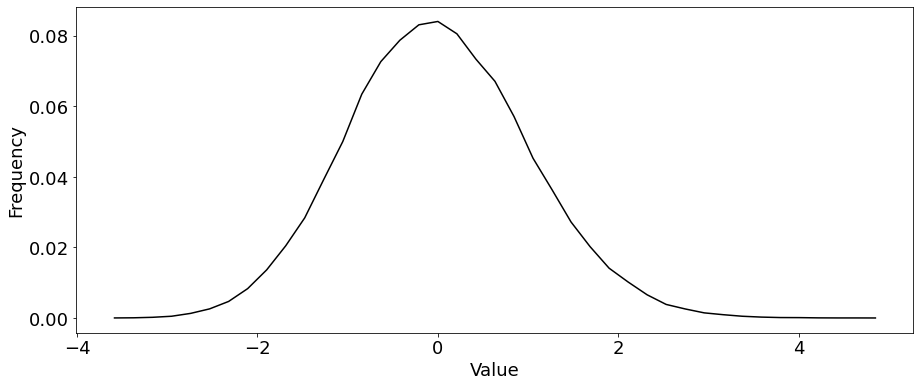

In [11]:
simulate_CLT(n=250, p=0.1, total=100000)